# Inferential process

In [1]:
#importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/EDA.csv", delimiter=",")

In [3]:
#i don't know why but the column Unnamed came back with wrong values ?
df

,Unnamed: 0,bloc_id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...,...
14086,16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
14087,16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
14088,16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
14089,16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [4]:
#droping the column
df = df.drop('Unnamed: 0',axis=1)

In [5]:
#making a sample to run tests for the target
sample = df.sample(1500,random_state=1)

## anova

### shapiro hypothesises:

i will be making tests for ocean_proximity since it's the only qualitative variable

H0 : if p-value > 5%, it is a normal distribution

H1 : if p-value < 5%, it isn't a normal distribution

In [6]:
#p value is <5%, so it isn't a normal distribution, the H1 hypothesis is confirmed
model_patsy = ols(f'median_house_value ~ ocean_proximity', data=sample).fit()
stats.shapiro(model_patsy.resid)

ShapiroResult(statistic=0.9493240714073181, pvalue=2.4974455259438283e-22)

### levene test

H0 : if p-value > 5%, the variables have the same variances

H1 : if p-value < 5%, the variables doesn't have the same variances

In [7]:
#looking for homoscédasticity in the values of the variables 
#H1 is confirmed, it is not advisable and usefull to do the anova test with our current data
stats.levene(sample['median_house_value'][sample['ocean_proximity'] == 'INLAND'],
             sample['median_house_value'][sample['ocean_proximity'] == '<1H OCEAN'],
             sample['median_house_value'][sample['ocean_proximity'] == 'NEAR OCEAN'],
             sample['median_house_value'][sample['ocean_proximity'] == 'NEAR BAY'])

LeveneResult(statistic=35.321645915570784, pvalue=4.702165631955395e-22)

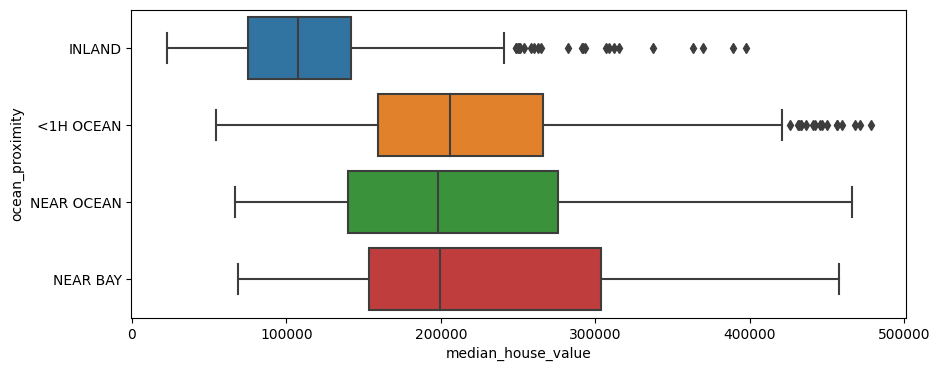

In [8]:
#plotting it
plt.subplots(figsize=(10,4))
ax = sns.boxplot(x="median_house_value", y="ocean_proximity", data=sample)

## pearson test

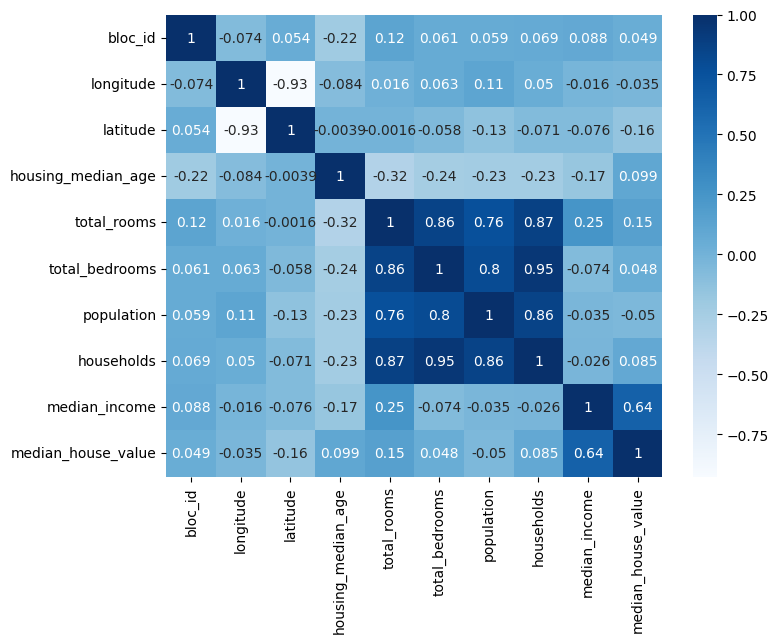

In [9]:
#heatmap of correlations for the pearson test
heat = sample.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(heat, annot=True,cmap='Blues')
plt.show()

H0: p-value >5%, the variables are independent

H1: p-value <5%, the variables are dependent

In [10]:
#looking at the highest correlated variable (median_income) with median_house_value
#unfortunately they are highly independant
pearsonr(sample.median_house_value, sample.median_income)

(0.6365422070166361, 3.3218185415471773e-171)

## CHI2 test

In [11]:
X = "fav"
Y = "sex"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

NameError: name 'X' is not defined

In [ ]:
chi2, p, dof, exp = chi2_contingency(cont)

In [ ]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(librairie)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],cmap=plt.cm.BuPu)
plt.show()